<h1 align="center">Ensembling</h1>

## Program so far

- Linear Regression
- Logistic Regression
- Decision Trees

## Agenda

- What is ensembling?
- Types of ensembling
- Naive aggregation or voting
- Bootstrap Aggregating or Bagging
- Stacking


## Lucius goes to John
***
Lucius goes on a pilot trip to visit certain universities in Brooklyn. On his way back he decided to pay a visit to John. He got a six-pack of Heineken a rushed to John's place.

A much more confident John, played an excellent host to Lucius. While discussing, Lucius discussed a few issues that he was facing. Lucius was through with Decision Trees, but being an Applied Math enthusiast, he was not satisfied with the result. ("You know how they are!") He wanted a more accurate result.

John invited Jay over as he lived only a couple of blocks away.

## Jay Helps
***
Jay patiently paid an ear to Lucius's problem. And helped him with Ensembling.

In [1]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv('./data/loan_prediction.csv')
dataframe.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         0.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Loan_Status  
0             1.0            1  
1             1.0            0  
2             1.0            1  
3             1.0            1  
4             1.0            1

Split the original data into train & test data, with the column `Loan Status` as the target variable.

In [2]:
from sklearn.model_selection import train_test_split

X = dataframe.iloc[:, 0:5]
y = dataframe.iloc[:, 5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## So what is Ensembling?
***
Ensemble techniques are methods of improving classification accuracy by aggregating predictions over several learners.
Ensembling helps improvise on the stability and predictive power of the model.

Ensemble modeling is a powerful way to improve the performance of your model. It usually pays off to apply ensemble learning over and above various models you might be building. 


## Introduction to Ensemble Methods
***
Let's explore this technique of Ensembling using an example.

#### Condorcet’s Jury Theorem
Let's say a jury of voters need to make a decision regarding a binary outcome (for example to convict a defendant or not).

If each voter has a probability p of being correct and the probability of a majority of voters being correct is L then
p > 0.5 implies L > p

L approaches 1, for all p > 0.5 as the number of voters approaches infinity.

## Introduction to Ensemble Methods

#### Condorcet’s Jury Theorem

It is assumed that all the voters are independent.

The requirement that p > 0.5 can be thought of as requiring that the individual judgements (votes) are at least a little better than random chance.

Producing jury members (models) whose votes (predictions) are independent has a lot of practical issues, but the principle behind Condorcet's Jury Theorem can still be applied to Supervised Machine Learning.


## Strong Learners vs Weak Learners


#### Strong Learner
We call a machine learning model a Strong Learner which, given a labeled dataset, can produce a classifier to arbitrary accuracy.

#### Weak Learner
Given a labeled dataset, a Weak Learner produces a classifier which is at least a little more accurate than random classification.



## Ensemble of Weak Learner
Given the formulation above, the question we want to ask is this:
      
**Can an ensemble of weak classifiers produce a single strong classifier?**

## Ensemble of Weak Learner

Condorcet Jury Theorem implies that 
if we could create an ensemble of independent classifiers, each of which classifies with accuracy at least slightly better than 0.5, 
we would be able to build a classifier (the ensemble classifier) which outperforms all of the individual classifiers.

In empirical studies[1] , it has been often seen the predictions made by a group of people, even if they are not experts, often performs better than predictions made by any one expert.
It makes sense to try the same approach in Machine Learning as well. The class of models thus generated are collectively referred to as Ensemble Models.



## Ensemble of Wise Learners

* To build ensemble models, we combine multiple models using different methods (naive aggregation, stacking, bagging, boosting) and hope that the wisdom of the crowd outperforms any individual model.

* Naturally, not all crowds are wise (for example, greedy investors of a stock market bubble).

**Surowiecki** presents a simple framework to evaluate if a given crowd is wise:

**Independence :** Members’ opinions are not determined by the opinions of those around them.

**Diversity of opinion :** Each member should have private information even if it is just an eccentric interpretation of the known facts.

**Decentralization :** Members are able to specialize and draw conclusions based on local knowledge.

**Aggregation :** Some mechanism exists for turning private judgments into a collective decision.



#### Approaches to combine several machine learning techniques into one predictive model in order to

* Decrease the variance 
* Decrease the bias
* Improve the predictive force

## How Ensemble Method Work
***
Lucius, being in a hurry was keen to jump on how to do things rather than fundamental concepts.

## So How does Ensemble Method Work
***
Every ensemble algorithm consists of two steps:

* Producing a distribution of simple ML models on subsets of the original data.

* Combining the distribution into one "aggregated" model.

## Types of Ensemble Methods
***
* Naive Aggregation
* Bagging
* Boosting(will be covered later)
* Stacking

Let's explore each of the techniques one by one.

### Naive Aggregation
***
As Lucius has a background of Applied Maths, he has built a strong intuition over the year. Lucius pointed out that the most obvious and easiest way would be to average out all the possibilities and that would be the final output.Indeed, it was.

### Naive Aggregation
***
- Works by aggregating the final output through averaging (regression) or voting (classification).
- A more sophisticated ensemble might assign weightage to the predictions by different learners while aggregating.
- Works best with algorithms which learn very differently from each other, thereby complementing each other’s decisions

**Brain teaser :**
When does a voting classifier out do its base learner and when it doesn’t?

## Soft Voting vs Hard Voting

**Hard Voting :**
* In hard voting, the voting classifier takes majority of its base learners’ predictions

**Soft Voting :**
* In soft voting, the voting classifier takes into account the probability values by its base learners 

Soft voting has been observed to perform better than hard voting on some occasions.

Let's apply Soft Voting and Hard Voting on the loan prediction dataset.
We can pass in a number of classifiers to it.
We also check the accuracy by both these methods.We will be using the **VotingClassifier** class in sklearn.


In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression()
decision_clf = DecisionTreeClassifier()

# Hard Voting
voting_clf_hard = VotingClassifier(estimators = [('Logistic Regression', log_clf),
                                            ('Decision Tree', decision_clf)],
                             voting = 'hard')
voting_clf_hard.fit(X_train, y_train)
y_pred_hard = voting_clf_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)

# Soft Voting
voting_clf_soft = VotingClassifier(estimators = [('Logistic Regression', log_clf),
                                            ('Decision Tree', decision_clf)],
                             voting = 'soft')
voting_clf_soft.fit(X_train, y_train)
y_pred_soft = voting_clf_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test, y_pred_soft)

print(accuracy_hard, accuracy_soft)
# print(np.var(dataframe))

(0.67567567567567566, 0.6594594594594595)


## Bagging

Bagging stands for **B**ootstrap **Agg**regat**ing**.
¶

In ensemble algorithms, bagging methods form a class of algorithms which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction. 

Unlike naive aggregator, uses a single type of base learner.
Bagging is a method that involves manipulating the training set by resampling. We learn k base classifiers on k different samples of training data.

Bagging provides a way to reduce overfitting, bagging methods work best with strong and complex models (e.g., fully developed decision trees).

## Bagging
* These samples are independently created by resampling the training data using uniform weights (eg, a uniform sampling distribution), 

* This means that the sampling of data points happens with replacement. The process of sampling with replacement is called Bootstrapping.

* Each individual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance.

* Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set.


* Predictors can all be trained in parallel, via different CPU cores or even different servers. 
* Similarly, predictions can be made in parallel. 
* This is one of the reasons why bagging and pasting are such popular methods: they scale very well.


Now, lets apply Bagging to the above dataset.
Here, we use Decision Trees as the base classifier on which we apply the Bagging method
We also compare the accuracy of a Decision Tree against an Ensemble of Decision trees.

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

decision_clf = DecisionTreeClassifier()
decision_clf.fit(X_train, y_train)
y_pred_decision = decision_clf.predict(X_test)
score = accuracy_score(y_test, y_pred_decision)

bagging_clf = BaggingClassifier(DecisionTreeClassifier(random_state=9),
                               n_estimators=100,
                               max_samples=100,
                               bootstrap=True,
                               random_state=9)

bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_bagging)
print(accuracy, score)

(0.74594594594594599, 0.65405405405405403)


We can easily observe that the accuracy of a BaggingClassifier is much better then that of a single Decision Tree.

## Example 

Let’s understand this through an example of a multi-speciality hospital.
Let’s say the hospital has 3 medical interns which it can train.
The hospital sees 3 types of cases: heart attack, broken bones and cancer.

Now we have 2 ways we can train the interns:
* We let all the interns handle all types of cases 
* We let each intern handle a specific type of case

If we choose option 1, we can create 3 doctors who can take care of wide range of cases but since their exposure to each type of case is limited, their expertise in each type  of case is also limited.

On the other side, if we let each intern learn from specific class of experience, they can become specialists. 

**Similarly, in bagging, by training each base learner on different sample of data, we make specialist sub learners.**

## Pasting

Just as in bagging we create samples through repeated resampling with replacement, we can create samples with repeated resampling without replacement for each base learner

When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting.

## Bagging vs Pasting

* Both bagging and pasting allow training instances to be sampled several times across multiple predictors
* But only bagging allows training instances to be sampled several times for the same predictor.
* Bootstrapping introduces a bit more diversity in the subsets that each predictor is trained on, so bagging ends up with a slightly higher bias than pasting
* This also means that predictors end up being less correlated so the ensemble’s variance is reduced. 
* Overall, bagging often results in better models, which explains why it is generally preferred. 
* However, given spare time and CPU power it is worth using cross- validation to evaluate both bagging and pasting and select the one that works best.


## Bagging reduces Variance
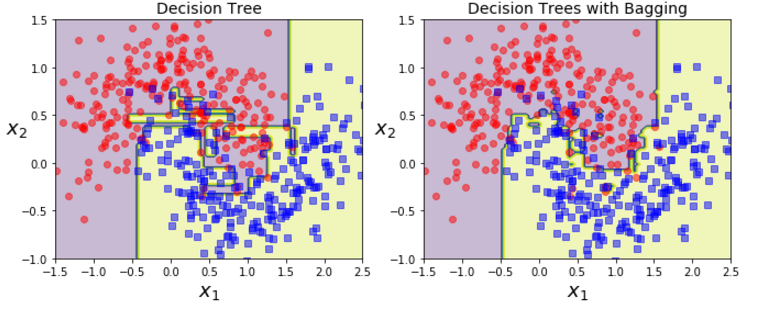

## Out of Bag Evaluation
Let’s consider Bootstrapping with n samples:

* The probability of each sample being selected is 1/n
* Hence, the probability of not being selected is (1-1/n)
* If m such samples are created, then the probability of a sample never being selected is p =  (1-1/n)<sup>m</sup>
* When n and m approach large numbers, p ~ e-1 ~ 0.368
* Which means that for each bootstrapping, around 3rd of the original sample will end up not being selected
* Since a predictor never sees the oob instances during training, it can be evaluated on these instances, without the need for a separate validation set or cross-validation.
* And since this unselected sample is not in the bag, this validation called out-of-bag evaluation


Similar to the above approach, we just add a new parameter `oob_score` and set it to True, whose default value is False. We also, check out its accuracy.

In [5]:
out_of_bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=9),
                                  n_estimators=100,
                                  max_samples=100,
                                  bootstrap=True,
                                  oob_score=True,
                                  random_state=9)
out_of_bag_clf.fit(X_train, y_train)
y_pred = out_of_bag_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.74594594594594599

## Bagging through Random Forest
* Random Forest is a bagging algorithm with decision tree as base classifier/regressor
* The Random Forest algorithm introduces extra randomness when growing trees 
* Instead of searching for the very best feature when splitting a node it searches for the best feature among a random subset of features. 
* This results in a greater tree diversity, which trades a higher bias for a lower variance, generally yielding an overall better model. 

## Bagging

Their weakness can be controlled through hyperparameter tuning, we have already seen such hyperparameters tuning techniques:
* Stemming
* Pruning
One more reason why decision trees are great for bagging they are easy to train.

## Stacking

Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier
It is based on a simple idea: instead of using trivial functions to aggregate the predictions of all predictors in an ensemble, we train a model to perform this aggregation.

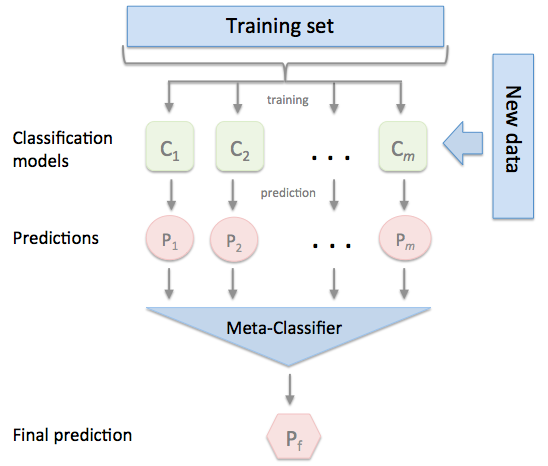

## How Stacking works?
* First, the training set is split in two subsets. 
* The first subset is used to train the predictors in the first layer
* Next, the first layer predictors are used to make predictions on the second (held-out) set
* This ensures that the predictions are “clean,” since the predictors never saw these instances during training.
* The meta-classifier is trained on this new training set, so it learns to predict the target value given the first layer’s predictions.


## But ...

Sadly, stacking is not implemented in sklearn.

Scikit-Learn does not support stacking directly, luckily but it is not very hard to create your own stacking ensemble
Alternatively a python library called mlextend supports stacking and has very similar api as sklearn!


Check out the link for `Stacking` implementation.

**Stacking Classifier** is implemented in the **mxltend** library.
https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/

You can install it using the `pip` command.

**pip install mlxtend**

In [8]:
from mlxtend.classifier import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier() 
# passing a list of prediction models
models = [log_clf, decision_tree_clf]

stacking_clf = StackingClassifier(classifiers = models,
                                 meta_classifier = decision_tree_clf)

stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.69729729729729728